In [ ]:
from google.colab import drive
drive.mount('/content/drive')

### Imports

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

## 1. DoH Detection

### 1. Load Dataset

In [ ]:
doh_df = pd.read_csv('/content/drive/MyDrive/Major Project/Datasets/l1-doh.csv', delimiter=',')
non_doh_df = pd.read_csv('/content/drive/MyDrive/Major Project/Datasets/l1-nondoh.csv', delimiter=',')

In [ ]:
doh_df.head()

,SourceIP,DestinationIP,SourcePort,DestinationPort,TimeStamp,Duration,FlowBytesSent,FlowSentRate,FlowBytesReceived,FlowReceivedRate,...,PacketTimeCoefficientofVariation,ResponseTimeTimeVariance,ResponseTimeTimeStandardDeviation,ResponseTimeTimeMean,ResponseTimeTimeMedian,ResponseTimeTimeMode,ResponseTimeTimeSkewFromMedian,ResponseTimeTimeSkewFromMode,ResponseTimeTimeCoefficientofVariation,Label
0,192.168.20.191,176.103.130.131,50749,443,2020-01-14 15:49:11,95.081550,62311,655.342703,65358,687.388878,...,0.574626,0.001053,0.032457,0.027624,0.026854,0.026822,0.071187,0.024715,1.174948,DoH
1,192.168.20.191,176.103.130.131,50749,443,2020-01-14 15:50:52,122.309318,93828,767.136973,101232,827.672018,...,0.509047,0.001170,0.034200,0.024387,0.021043,0.026981,0.293297,-0.075845,1.402382,DoH
2,192.168.20.191,176.103.130.131,50749,443,2020-01-14 15:52:55,120.958413,38784,320.639127,38236,316.108645,...,0.732636,0.000785,0.028021,0.029238,0.026922,0.026855,0.248064,0.085061,0.958348,DoH
3,192.168.20.191,176.103.130.131,50749,443,2020-01-14 15:54:56,110.501080,61993,561.017141,69757,631.278898,...,0.646859,0.000411,0.020274,0.019925,0.019268,0.026918,0.097199,-0.344926,1.017535,DoH
4,176.103.130.131,192.168.20.191,443,50749,2020-01-14 15:56:46,54.229891,83641,1542.341289,76804,1416.266907,...,0.507334,0.079079,0.281209,0.025930,0.000046,0.000021,0.276133,0.092135,10.844829,DoH


In [ ]:
non_doh_df.head()

,SourceIP,DestinationIP,SourcePort,DestinationPort,TimeStamp,Duration,FlowBytesSent,FlowSentRate,FlowBytesReceived,FlowReceivedRate,...,PacketTimeCoefficientofVariation,ResponseTimeTimeVariance,ResponseTimeTimeStandardDeviation,ResponseTimeTimeMean,ResponseTimeTimeMedian,ResponseTimeTimeMode,ResponseTimeTimeSkewFromMedian,ResponseTimeTimeSkewFromMode,ResponseTimeTimeCoefficientofVariation,Label
0,72.21.91.42,192.168.20.191,443,51041,2020-01-14 15:49:01,4.544040,11256331,2.477164e+06,159324,35062.191354,...,0.580949,1.107852e-07,0.000333,0.000027,0.000016,0.000014,0.096659,0.038228,12.454823,NonDoH
1,192.168.20.191,195.201.169.48,51043,443,2020-01-14 15:49:03,8.171041,930,1.138166e+02,11936,1460.768585,...,1.745138,3.224052e+00,1.795565,0.886579,0.103698,0.000900,1.308024,0.493259,2.025273,NonDoH
2,192.168.20.191,96.17.115.57,51021,443,2020-01-14 15:49:03,0.033776,162,4.796305e+03,138,4085.741355,...,0.500002,0.000000e+00,0.000000,0.033683,0.033683,0.033683,-10.000000,-10.000000,0.000000,NonDoH
3,192.168.20.191,96.114.14.140,50308,443,2020-01-14 15:49:03,0.060723,108,1.778568e+03,120,1976.186947,...,0.577350,0.000000e+00,0.000000,0.060687,0.060687,0.060687,-10.000000,-10.000000,0.000000,NonDoH
4,192.168.20.191,23.78.199.198,50983,443,2020-01-14 15:49:03,0.019545,55,2.814019e+03,66,3376.822717,...,1.000000,0.000000e+00,0.000000,0.019545,0.019545,0.019545,-10.000000,-10.000000,0.000000,NonDoH


In [ ]:
print('******************************************************************************************************\n')
print('Data samples: \n')
print('\tNo.of DoH samples:', (doh_df['Label']=='DoH').sum())
print('\tDoH data shape:', doh_df.shape)
print('\tNo.of Non-DoH samples:', (non_doh_df['Label']=='NonDoH').sum())
print('\tDoH data shape:', non_doh_df.shape)
print('\n******************************************************************************************************')

******************************************************************************************************

Data samples: 

	No.of DoH samples: 269643
	DoH data shape: (269643, 35)
	No.of Non-DoH samples: 897493
	DoH data shape: (897493, 35)

******************************************************************************************************


In [ ]:
doh_df['Label'] = 1   # DoH
non_doh_df['Label'] = 0   # Non DoH
data = shuffle(pd.concat([doh_df, non_doh_df]))
data.head()

,SourceIP,DestinationIP,SourcePort,DestinationPort,TimeStamp,Duration,FlowBytesSent,FlowSentRate,FlowBytesReceived,FlowReceivedRate,...,PacketTimeCoefficientofVariation,ResponseTimeTimeVariance,ResponseTimeTimeStandardDeviation,ResponseTimeTimeMean,ResponseTimeTimeMedian,ResponseTimeTimeMode,ResponseTimeTimeSkewFromMedian,ResponseTimeTimeSkewFromMode,ResponseTimeTimeCoefficientofVariation,Label
90333,192.168.20.191,185.199.111.154,55846,443,2020-01-13 19:43:44,0.014898,55,3691.770707,66,4430.124849,...,1.000000,0.000000e+00,0.000000,0.014898,0.014898,0.014898,-10.000000,-10.000000,0.000000,0
155895,192.168.20.209,9.9.9.11,54374,443,2020-03-31 01:54:57,33.269321,1807,54.314304,4895,147.132549,...,1.639429,3.519459e-04,0.018760,0.019422,0.016645,0.000292,0.444042,1.019699,0.965937,1
684525,192.168.20.191,172.217.164.206,49313,443,2020-01-13 14:08:03,90.070261,165,1.831903,198,2.198284,...,0.816332,5.066667e-11,0.000007,0.022387,0.022383,0.022381,1.685854,0.842927,0.000318,0
513812,192.168.20.111,74.125.20.154,52124,443,2019-12-19 19:59:34,0.178343,897,5029.633908,3144,17628.950954,...,0.473364,1.366645e-03,0.036968,0.056937,0.080394,0.004745,-1.903557,1.411809,0.649282,0
471421,192.168.20.191,172.217.165.14,61282,443,2020-01-14 19:21:03,0.025368,55,2168.085777,66,2601.702933,...,1.000000,0.000000e+00,0.000000,0.025368,0.025368,0.025368,-10.000000,-10.000000,0.000000,0


In [ ]:
print(data.columns)
print(data.isna().sum())

Index(['SourceIP', 'DestinationIP', 'SourcePort', 'DestinationPort',
       'TimeStamp', 'Duration', 'FlowBytesSent', 'FlowSentRate',
       'FlowBytesReceived', 'FlowReceivedRate', 'PacketLengthVariance',
       'PacketLengthStandardDeviation', 'PacketLengthMean',
       'PacketLengthMedian', 'PacketLengthMode', 'PacketLengthSkewFromMedian',
       'PacketLengthSkewFromMode', 'PacketLengthCoefficientofVariation',
       'PacketTimeVariance', 'PacketTimeStandardDeviation', 'PacketTimeMean',
       'PacketTimeMedian', 'PacketTimeMode', 'PacketTimeSkewFromMedian',
       'PacketTimeSkewFromMode', 'PacketTimeCoefficientofVariation',
       'ResponseTimeTimeVariance', 'ResponseTimeTimeStandardDeviation',
       'ResponseTimeTimeMean', 'ResponseTimeTimeMedian',
       'ResponseTimeTimeMode', 'ResponseTimeTimeSkewFromMedian',
       'ResponseTimeTimeSkewFromMode',
       'ResponseTimeTimeCoefficientofVariation', 'Label'],
      dtype='object')
SourceIP                                     0
D

In [ ]:
data = data.dropna()
print(data.isna().sum())

SourceIP                                  0
DestinationIP                             0
SourcePort                                0
DestinationPort                           0
TimeStamp                                 0
Duration                                  0
FlowBytesSent                             0
FlowSentRate                              0
FlowBytesReceived                         0
FlowReceivedRate                          0
PacketLengthVariance                      0
PacketLengthStandardDeviation             0
PacketLengthMean                          0
PacketLengthMedian                        0
PacketLengthMode                          0
PacketLengthSkewFromMedian                0
PacketLengthSkewFromMode                  0
PacketLengthCoefficientofVariation        0
PacketTimeVariance                        0
PacketTimeStandardDeviation               0
PacketTimeMean                            0
PacketTimeMedian                          0
PacketTimeMode                  

In [ ]:
counts = data['Label'].value_counts()
counts

0    889809
1    269299
Name: Label, dtype: int64

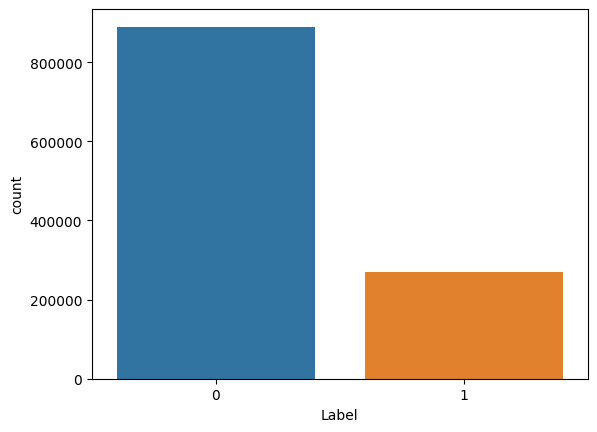

In [ ]:
sns.countplot(x='Label', data=data);

### 2. Data Preprocessing

In [ ]:
le = LabelEncoder()
data['SourceIP'] = le.fit_transform(data['SourceIP'])
data['DestinationIP'] = le.fit_transform(data['DestinationIP'])
data['SourcePort'] = le.fit_transform(data['SourcePort'])
data['DestinationPort'] = le.fit_transform(data['DestinationPort'])

In [ ]:
X = data.drop(['TimeStamp', 'Label'],axis=1)
y = data['Label'].values

In [ ]:
X.head()

,SourceIP,DestinationIP,SourcePort,DestinationPort,Duration,FlowBytesSent,FlowSentRate,FlowBytesReceived,FlowReceivedRate,PacketLengthVariance,...,PacketTimeSkewFromMode,PacketTimeCoefficientofVariation,ResponseTimeTimeVariance,ResponseTimeTimeStandardDeviation,ResponseTimeTimeMean,ResponseTimeTimeMedian,ResponseTimeTimeMode,ResponseTimeTimeSkewFromMedian,ResponseTimeTimeSkewFromMode,ResponseTimeTimeCoefficientofVariation
90333,2794,13617,14885,0,0.014898,55,3691.770707,66,4430.124849,30.250000,...,1.000000,1.000000,0.000000e+00,0.000000,0.014898,0.014898,0.014898,-10.000000,-10.000000,0.000000
155895,2800,31699,13413,0,33.269321,1807,54.314304,4895,147.132549,141408.773333,...,0.609968,1.639429,3.519459e-04,0.018760,0.019422,0.016645,0.000292,0.444042,1.019699,0.965937
684525,2794,11262,8352,0,90.070261,165,1.831903,198,2.198284,30.250000,...,1.224992,0.816332,5.066667e-11,0.000007,0.022387,0.022383,0.022381,1.685854,0.842927,0.000318
513812,2790,30675,11163,0,0.178343,897,5029.633908,3144,17628.950954,737297.290000,...,2.112538,0.473364,1.366645e-03,0.036968,0.056937,0.080394,0.004745,-1.903557,1.411809,0.649282
471421,2794,11292,20321,0,0.025368,55,2168.085777,66,2601.702933,30.250000,...,1.000000,1.000000,0.000000e+00,0.000000,0.025368,0.025368,0.025368,-10.000000,-10.000000,0.000000


In [ ]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [ ]:
X.shape

(1159108, 33)

In [ ]:
y.shape

(1159108,)

In [ ]:
X[0]

array([-0.04861669, -0.37203721,  0.50868686, -0.20867605, -0.59136931,
       -0.17221272, -0.02276411, -0.14265701, -0.11498541, -0.31733323,
       -0.81616698, -0.73798215, -0.30509837, -0.26444898, -0.58290323,
        0.63025238, -1.18557708, -0.42513323, -0.62519563, -0.50485559,
       -0.41176737, -0.14281767, -0.18844717, -0.13291839, -0.03501471,
       -0.12314035, -0.20300191, -0.16211309, -0.12057301, -0.0798543 ,
       -1.64967924, -1.70349823, -0.52561654])

### 3. Data Splitting

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=3)

In [ ]:
X_train, X_ul, y_train, y_ul = train_test_split(X_train, y_train, test_size=0.7, random_state=3)

### 4. Model training


In [ ]:
def model_acc_func(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_pred, y_test)
    print('Test Accuracy : \033[32m \033[01m {:.5f}% \033[30m \033[0m'.format(acc*100))
    print(classification_report(y_test, y_pred))
    cf_matrix = confusion_matrix(y_test, y_pred)
    sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True,fmt= '0.2%')
    return model, acc

#### ```LogisticRegression``` model

Test Accuracy :   94.47967%  
              precision    recall  f1-score   support

           0       0.96      0.97      0.96    267180
           1       0.90      0.86      0.88     80553

    accuracy                           0.94    347733
   macro avg       0.93      0.91      0.92    347733
weighted avg       0.94      0.94      0.94    347733



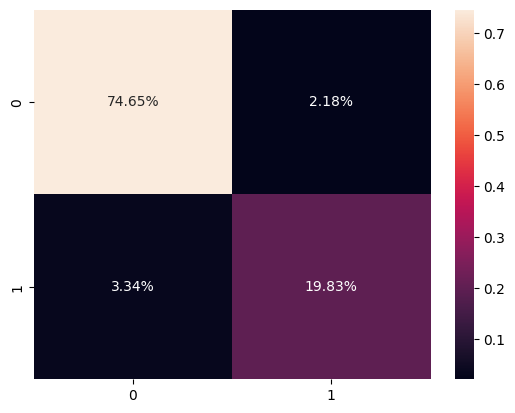

In [ ]:
lr_model, lr_acc = model_acc_func(SGDClassifier(loss='log_loss', random_state=42), X_train, y_train, X_test, y_test)

#### ```SGDClassifier``` model

Test Accuracy :   94.92110%  
              precision    recall  f1-score   support

           0       0.97      0.97      0.97    267180
           1       0.89      0.89      0.89     80553

    accuracy                           0.95    347733
   macro avg       0.93      0.93      0.93    347733
weighted avg       0.95      0.95      0.95    347733



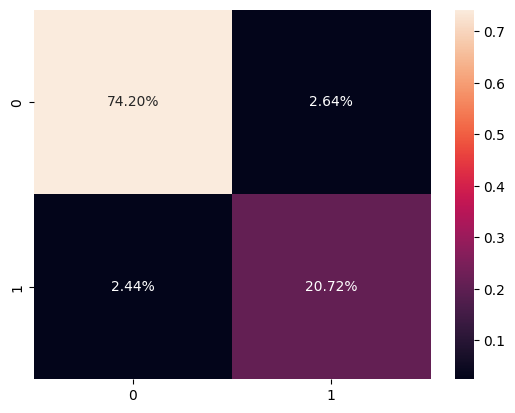

In [ ]:
sgd_model, sgd_acc = model_acc_func(SGDClassifier(max_iter=1000, tol=1e-3, random_state=42), X_train, y_train, X_test, y_test)

#### ```KNN``` model - 8min

Test Accuracy :   99.02023%  
              precision    recall  f1-score   support

           0       1.00      0.99      0.99    267180
           1       0.97      0.98      0.98     80553

    accuracy                           0.99    347733
   macro avg       0.98      0.99      0.99    347733
weighted avg       0.99      0.99      0.99    347733



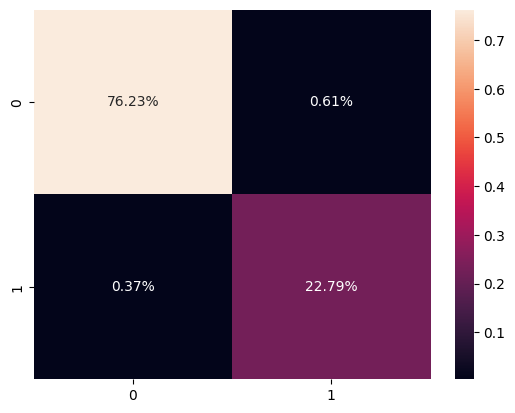

In [ ]:
knn_model, knn_acc = model_acc_func(KNeighborsClassifier(), X_train, y_train, X_test, y_test)

#### Linear ```SVM``` model

Test Accuracy :   94.92110%  
              precision    recall  f1-score   support

           0       0.97      0.97      0.97    267180
           1       0.89      0.89      0.89     80553

    accuracy                           0.95    347733
   macro avg       0.93      0.93      0.93    347733
weighted avg       0.95      0.95      0.95    347733



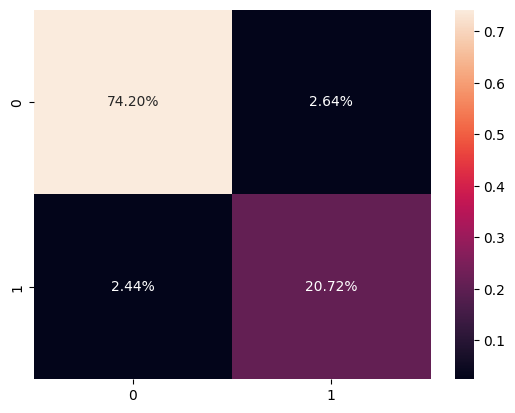

In [ ]:
linear_svm_model, linear_svm_acc = model_acc_func(SGDClassifier(loss='hinge', random_state=42), X_train, y_train, X_test, y_test)

#### ```SVM``` model - 22min

Test Accuracy :   98.30502%  
              precision    recall  f1-score   support

           0       0.99      0.99      0.99    267180
           1       0.96      0.96      0.96     80553

    accuracy                           0.98    347733
   macro avg       0.98      0.98      0.98    347733
weighted avg       0.98      0.98      0.98    347733



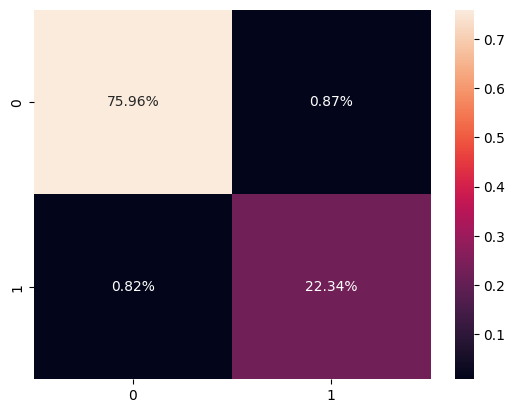

In [ ]:
svm_model, svm_acc = model_acc_func(SVC(), X_train, y_train, X_test, y_test)

#### ```MLPClassifier``` model - 3min

Test Accuracy :   99.50393%  
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    267180
           1       0.99      0.98      0.99     80553

    accuracy                           1.00    347733
   macro avg       0.99      0.99      0.99    347733
weighted avg       1.00      1.00      1.00    347733



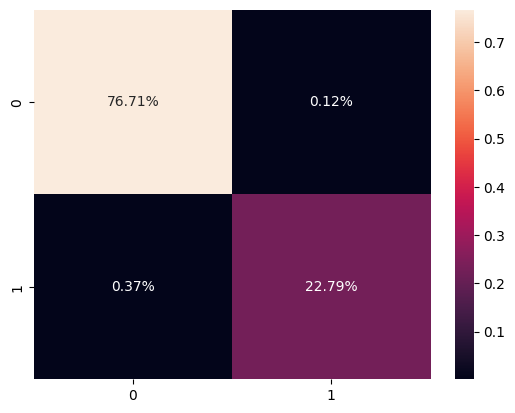

In [ ]:
mlp_model, mlp_acc = model_acc_func(MLPClassifier(), X_train, y_train, X_test, y_test)

#### ```GradientBoostingClassifier``` model

Test Accuracy :   97.86445%  
              precision    recall  f1-score   support

           0       0.98      0.99      0.99    267180
           1       0.97      0.94      0.95     80553

    accuracy                           0.98    347733
   macro avg       0.97      0.96      0.97    347733
weighted avg       0.98      0.98      0.98    347733



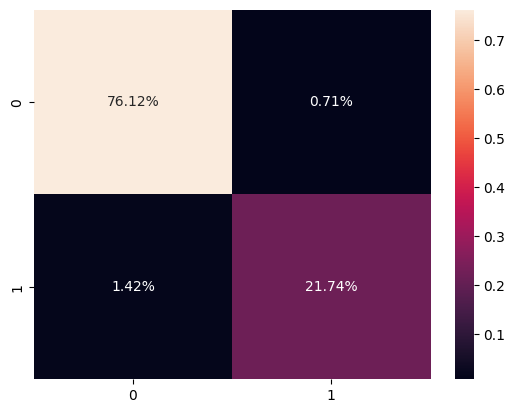

In [ ]:
gbc_model, gbc_acc = model_acc_func(GradientBoostingClassifier(n_estimators=10, learning_rate=1.0, max_depth=1, random_state=0), X_train, y_train, X_test, y_test)

#### ```RandomForestClassifier``` model - 2min

Test Accuracy :   99.94450%  
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    267180
           1       1.00      1.00      1.00     80553

    accuracy                           1.00    347733
   macro avg       1.00      1.00      1.00    347733
weighted avg       1.00      1.00      1.00    347733



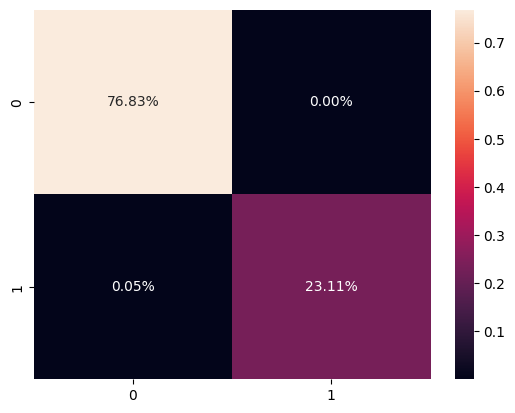

In [ ]:
rfc_model, rfc_acc = model_acc_func(RandomForestClassifier(), X_train, y_train, X_test, y_test)

#### ```DecisionTreeClassifier``` model

Test Accuracy :   99.90970%  
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    267180
           1       1.00      1.00      1.00     80553

    accuracy                           1.00    347733
   macro avg       1.00      1.00      1.00    347733
weighted avg       1.00      1.00      1.00    347733



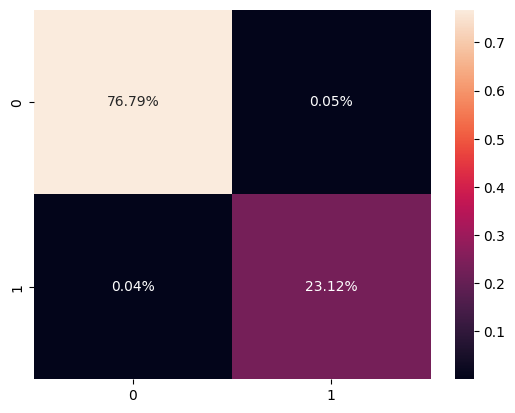

In [ ]:
dtc_model, dtc_acc = model_acc_func(DecisionTreeClassifier(), X_train, y_train, X_test, y_test)

In [ ]:
classification_probability = dtc_model.predict_proba(X_ul)
labels = dtc_model.predict(X_ul)

In [ ]:
df = pd.DataFrame(classification_probability, columns = ['Non-DoH', 'DoH']) 
df['label']=labels
df['actual']=y_ul
df['max_prob']=df[['Non-DoH', 'DoH']].max(axis=1)

In [ ]:
df.head()

,Non-DoH,DoH,label,actual,max_prob
0,1.0,0.0,0,0,1.0
1,0.0,1.0,1,1,1.0
2,1.0,0.0,0,0,1.0
3,0.0,1.0,1,1,1.0
4,1.0,0.0,0,0,1.0


In [ ]:
nc=np.arange(.9,1,.03)
print(nc)

[0.9  0.93 0.96 0.99]


In [ ]:
nc=np.arange(.9,1,.03)
acc=np.empty(22)
i=0
for k in np.nditer(nc):
    conf_ind=df['max_prob']>k
    X_train1 = np.append(X_train,X_ul[conf_ind,:],axis=0)
    y_train1 = np.append(y_train,df.loc[conf_ind,['label']])
    clf = DecisionTreeClassifier().fit(X_train1, y_train1)
    acc[i]=  clf.score(X_test, y_test)
    i = i + 1

(array([     0.,      0.,      0.,      0.,      0., 567963.,      0.,
             0.,      0.,      0.]),
 array([0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3, 1.4, 1.5]),
 <BarContainer object of 10 artists>)

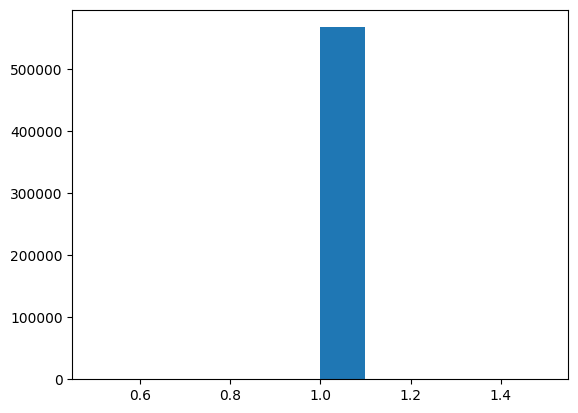

In [ ]:
plt.hist(df['max_prob'])

In [ ]:
X_train1.shape

(811375, 33)

Test Accuracy :   99.90251%  
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    267180
           1       1.00      1.00      1.00     80553

    accuracy                           1.00    347733
   macro avg       1.00      1.00      1.00    347733
weighted avg       1.00      1.00      1.00    347733



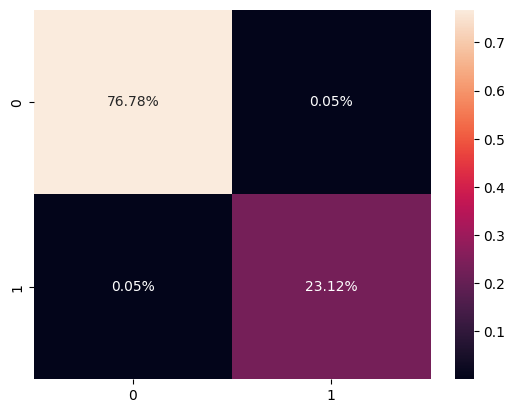

In [ ]:
final_dtc_model, final_dtc_model = model_acc_func(DecisionTreeClassifier(), X_train1, y_train1, X_test, y_test)

## 2. Malicious DoH Detection

### 1. Load Dataset

In [ ]:
benign_doh_df = pd.read_csv('/content/drive/MyDrive/Major Project/Datasets/l2-benign.csv', delimiter=',')
malicious_doh_df = pd.read_csv('/content/drive/MyDrive/Major Project/Datasets/l2-malicious.csv', delimiter=',')

In [ ]:
benign_doh_df.head()

,SourceIP,DestinationIP,SourcePort,DestinationPort,TimeStamp,Duration,FlowBytesSent,FlowSentRate,FlowBytesReceived,FlowReceivedRate,...,PacketTimeCoefficientofVariation,ResponseTimeTimeVariance,ResponseTimeTimeStandardDeviation,ResponseTimeTimeMean,ResponseTimeTimeMedian,ResponseTimeTimeMode,ResponseTimeTimeSkewFromMedian,ResponseTimeTimeSkewFromMode,ResponseTimeTimeCoefficientofVariation,Label
0,192.168.20.191,176.103.130.131,50749,443,2020-01-14 15:49:11,95.081550,62311,655.342703,65358,687.388878,...,0.574626,0.001053,0.032457,0.027624,0.026854,0.026822,0.071187,0.024715,1.174948,Benign
1,192.168.20.191,176.103.130.131,50749,443,2020-01-14 15:50:52,122.309318,93828,767.136973,101232,827.672018,...,0.509047,0.001170,0.034200,0.024387,0.021043,0.026981,0.293297,-0.075845,1.402382,Benign
2,192.168.20.191,176.103.130.131,50749,443,2020-01-14 15:52:55,120.958413,38784,320.639127,38236,316.108645,...,0.732636,0.000785,0.028021,0.029238,0.026922,0.026855,0.248064,0.085061,0.958348,Benign
3,192.168.20.191,176.103.130.131,50749,443,2020-01-14 15:54:56,110.501080,61993,561.017141,69757,631.278898,...,0.646859,0.000411,0.020274,0.019925,0.019268,0.026918,0.097199,-0.344926,1.017535,Benign
4,176.103.130.131,192.168.20.191,443,50749,2020-01-14 15:56:46,54.229891,83641,1542.341289,76804,1416.266907,...,0.507334,0.079079,0.281209,0.025930,0.000046,0.000021,0.276133,0.092135,10.844829,Benign


In [ ]:
malicious_doh_df.head()

,SourceIP,DestinationIP,SourcePort,DestinationPort,TimeStamp,Duration,FlowBytesSent,FlowSentRate,FlowBytesReceived,FlowReceivedRate,...,PacketTimeCoefficientofVariation,ResponseTimeTimeVariance,ResponseTimeTimeStandardDeviation,ResponseTimeTimeMean,ResponseTimeTimeMedian,ResponseTimeTimeMode,ResponseTimeTimeSkewFromMedian,ResponseTimeTimeSkewFromMode,ResponseTimeTimeCoefficientofVariation,Label
0,192.168.20.205,8.8.4.4,41018,443,2020-03-25 04:40:42,120.731389,46446,384.705257,85465,707.893786,...,0.622162,0.000070,0.008369,0.011880,0.015244,0.015221,-1.205904,-0.399220,0.704513,Malicious
1,8.8.4.4,192.168.20.205,443,41018,2020-03-25 04:42:42,120.052751,470548,3919.510349,227661,1896.341384,...,0.331509,0.023756,0.154130,0.037553,0.000049,0.000039,0.729988,0.243394,4.104293,Malicious
2,8.8.4.4,192.168.20.205,443,41018,2020-03-25 04:44:42,120.034398,747083,6223.907584,355181,2958.993471,...,0.579348,0.000276,0.016611,0.011986,0.000048,0.000030,2.156008,0.719753,1.385888,Malicious
3,8.8.4.4,192.168.20.205,443,41018,2020-03-25 04:46:42,120.004804,745382,6211.268009,354606,2954.931704,...,0.580188,0.000271,0.016473,0.011724,0.000049,0.000031,2.126128,0.709802,1.405118,Malicious
4,8.8.4.4,192.168.20.205,443,41018,2020-03-25 04:48:42,120.025620,749888,6247.732776,356531,2970.457474,...,0.578922,0.000271,0.016458,0.011725,0.000048,0.000031,2.128463,0.710521,1.403698,Malicious


In [ ]:
print('******************************************************************************************************\n')
print('DoH data samples: \n')
print('\tNo.of Benign DoH samples:', (benign_doh_df['Label']=='Benign').sum())
print('\tBenign DoH data shape:', benign_doh_df.shape)
print('\tNo.of Malicious DoH samples:', (malicious_doh_df['Label']=='Malicious').sum())
print('\tMalicious DoH data shape:', malicious_doh_df.shape)
print('\n******************************************************************************************************')

******************************************************************************************************

DoH data samples: 

	No.of Benign DoH samples: 19807
	Benign DoH data shape: (19807, 35)
	No.of Malicious DoH samples: 249836
	Malicious DoH data shape: (249836, 35)

******************************************************************************************************


In [ ]:
benign_doh_df['Label'] = 0   # Benign DoH
malicious_doh_df['Label'] = 1   # Malicious DoH
all_doh_data = shuffle(pd.concat([benign_doh_df, malicious_doh_df]))
all_doh_data.head()

,SourceIP,DestinationIP,SourcePort,DestinationPort,TimeStamp,Duration,FlowBytesSent,FlowSentRate,FlowBytesReceived,FlowReceivedRate,...,PacketTimeCoefficientofVariation,ResponseTimeTimeVariance,ResponseTimeTimeStandardDeviation,ResponseTimeTimeMean,ResponseTimeTimeMedian,ResponseTimeTimeMode,ResponseTimeTimeSkewFromMedian,ResponseTimeTimeSkewFromMode,ResponseTimeTimeCoefficientofVariation,Label
210047,192.168.20.204,9.9.9.11,50108,443,2020-03-31 02:08:33,0.535277,1085,2026.987896,4032,7532.548568,...,0.864333,1.472062e-04,0.012133,0.011721,0.009014,0.000021,0.669381,0.964337,1.035124,1
198749,192.168.20.210,9.9.9.11,45136,443,2020-03-24 15:53:13,120.014920,93937,782.711016,153891,1282.265572,...,0.364245,2.087373e-04,0.014448,0.020039,0.015539,0.015385,0.934472,0.322115,0.720987,1
170989,192.168.20.144,1.1.1.1,42298,443,2020-03-20 21:25:42,120.831989,504,4.171081,434,3.591764,...,0.618569,5.576327e-10,0.000024,0.015033,0.015042,0.015053,-1.179675,-0.859046,0.001571,1
107559,192.168.20.204,8.8.4.4,53524,443,2020-03-19 02:23:54,120.012205,351817,2931.510174,700435,5836.364726,...,0.318464,8.456482e-04,0.029080,0.010624,0.014766,0.000124,-0.427354,0.361056,2.737327,1
219498,192.168.20.204,9.9.9.11,44632,443,2020-03-31 04:32:43,34.076194,6123,179.685560,8701,255.339549,...,1.970647,5.770506e-05,0.007596,0.007760,0.007803,0.000033,-0.017048,1.017172,0.978937,1


In [ ]:
print(all_doh_data.columns)
print(all_doh_data.isna().sum())

Index(['SourceIP', 'DestinationIP', 'SourcePort', 'DestinationPort',
       'TimeStamp', 'Duration', 'FlowBytesSent', 'FlowSentRate',
       'FlowBytesReceived', 'FlowReceivedRate', 'PacketLengthVariance',
       'PacketLengthStandardDeviation', 'PacketLengthMean',
       'PacketLengthMedian', 'PacketLengthMode', 'PacketLengthSkewFromMedian',
       'PacketLengthSkewFromMode', 'PacketLengthCoefficientofVariation',
       'PacketTimeVariance', 'PacketTimeStandardDeviation', 'PacketTimeMean',
       'PacketTimeMedian', 'PacketTimeMode', 'PacketTimeSkewFromMedian',
       'PacketTimeSkewFromMode', 'PacketTimeCoefficientofVariation',
       'ResponseTimeTimeVariance', 'ResponseTimeTimeStandardDeviation',
       'ResponseTimeTimeMean', 'ResponseTimeTimeMedian',
       'ResponseTimeTimeMode', 'ResponseTimeTimeSkewFromMedian',
       'ResponseTimeTimeSkewFromMode',
       'ResponseTimeTimeCoefficientofVariation', 'Label'],
      dtype='object')
SourceIP                                    0
De

In [ ]:
all_doh_data = all_doh_data.dropna()
print(all_doh_data.isna().sum())

SourceIP                                  0
DestinationIP                             0
SourcePort                                0
DestinationPort                           0
TimeStamp                                 0
Duration                                  0
FlowBytesSent                             0
FlowSentRate                              0
FlowBytesReceived                         0
FlowReceivedRate                          0
PacketLengthVariance                      0
PacketLengthStandardDeviation             0
PacketLengthMean                          0
PacketLengthMedian                        0
PacketLengthMode                          0
PacketLengthSkewFromMedian                0
PacketLengthSkewFromMode                  0
PacketLengthCoefficientofVariation        0
PacketTimeVariance                        0
PacketTimeStandardDeviation               0
PacketTimeMean                            0
PacketTimeMedian                          0
PacketTimeMode                  

In [ ]:
doh_counts = all_doh_data['Label'].value_counts()
doh_counts

1    249553
0     19746
Name: Label, dtype: int64

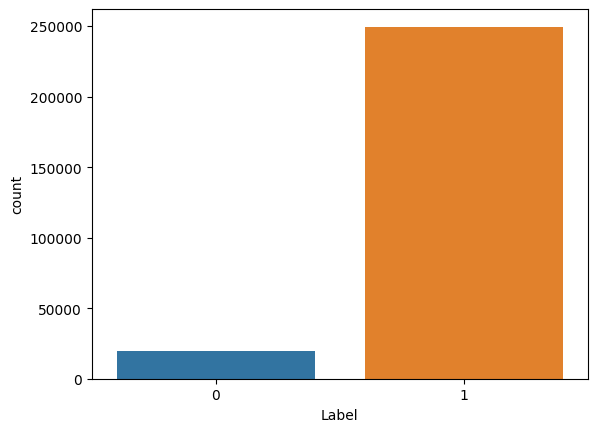

In [ ]:
sns.countplot(x='Label', data=all_doh_data);

### 3. Data Preprocessing

In [ ]:
le = LabelEncoder()
all_doh_data['SourceIP'] = le.fit_transform(all_doh_data['SourceIP'])
all_doh_data['DestinationIP'] = le.fit_transform(all_doh_data['DestinationIP'])
all_doh_data['SourcePort'] = le.fit_transform(all_doh_data['SourcePort'])
all_doh_data['DestinationPort'] = le.fit_transform(all_doh_data['DestinationPort'])

In [ ]:
X = all_doh_data.drop(['TimeStamp', 'Label'],axis=1)
y = all_doh_data['Label'].values

In [ ]:
X.head()

,SourceIP,DestinationIP,SourcePort,DestinationPort,Duration,FlowBytesSent,FlowSentRate,FlowBytesReceived,FlowReceivedRate,PacketLengthVariance,...,PacketTimeSkewFromMode,PacketTimeCoefficientofVariation,ResponseTimeTimeVariance,ResponseTimeTimeStandardDeviation,ResponseTimeTimeMean,ResponseTimeTimeMedian,ResponseTimeTimeMode,ResponseTimeTimeSkewFromMedian,ResponseTimeTimeSkewFromMode,ResponseTimeTimeCoefficientofVariation
210047,8,19,8731,0,0.535277,1085,2026.987896,4032,7532.548568,224634.645062,...,1.156962,0.864333,1.472062e-04,0.012133,0.011721,0.009014,0.000021,0.669381,0.964337,1.035124
198749,14,19,6185,0,120.014920,93937,782.711016,153891,1282.265572,15503.358193,...,2.745403,0.364245,2.087373e-04,0.014448,0.020039,0.015539,0.015385,0.934472,0.322115,0.720987
170989,6,0,4766,0,120.831989,504,4.171081,434,3.591764,8.859375,...,1.616636,0.618569,5.576327e-10,0.000024,0.015033,0.015042,0.015053,-1.179675,-0.859046,0.001571
107559,8,17,10833,0,120.012205,351817,2931.510174,700435,5836.364726,22561.813035,...,3.140073,0.318464,8.456482e-04,0.029080,0.010624,0.014766,0.000124,-0.427354,0.361056,2.737327
219498,8,19,5933,0,34.076194,6123,179.685560,8701,255.339549,293440.097544,...,0.507448,1.970647,5.770506e-05,0.007596,0.007760,0.007803,0.000033,-0.017048,1.017172,0.978937


In [ ]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [ ]:
X.shape

(269299, 33)

In [ ]:
y.shape

(269299,)

In [ ]:
X[0]

array([-0.24846642,  0.61555058,  0.59214226, -0.39952947, -1.17235843,
       -0.34027085, -0.03598173, -0.34779677,  0.00461395,  0.67639952,
        0.87411965,  1.05446679, -0.58686533,  0.00157308,  0.41473435,
        0.08853559,  0.59515436, -0.80698445, -1.28949324, -0.90786744,
       -0.71313745, -0.20637245, -0.61379721,  0.06763768, -0.40518754,
       -0.17920138, -0.24157638, -0.24037065, -0.22376728, -0.16031063,
        0.59022223,  0.13341657, -0.1467241 ])

### 4. Data Splitting

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=3)

In [ ]:
X_train, X_ul, y_train, y_ul = train_test_split(X_train, y_train, test_size=0.7, random_state=3)

### 5. Model training


In [ ]:
def model_acc_func(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_pred, y_test)
    print('Test Accuracy : \033[32m \033[01m {:.5f}% \033[30m \033[0m'.format(acc*100))
    print(classification_report(y_test, y_pred))
    cf_matrix = confusion_matrix(y_test, y_pred)
    sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True,fmt= '0.2%')
    return model, acc

#### ```LogisticRegression``` model

Test Accuracy :   96.97240%  
              precision    recall  f1-score   support

           0       0.86      0.70      0.77      5890
           1       0.98      0.99      0.98     74900

    accuracy                           0.97     80790
   macro avg       0.92      0.85      0.88     80790
weighted avg       0.97      0.97      0.97     80790



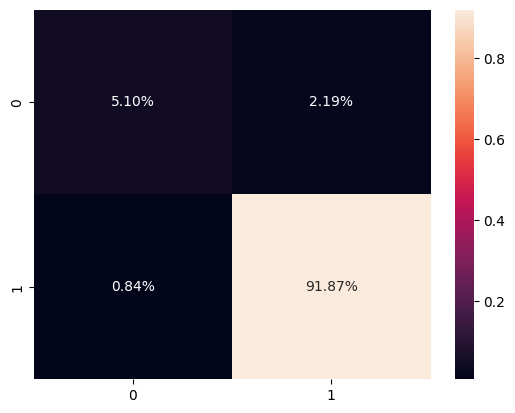

In [ ]:
lr_model, lr_acc = model_acc_func(SGDClassifier(loss='log_loss', random_state=42), X_train, y_train, X_test, y_test)

#### ```SGDClassifier``` model

Test Accuracy :   97.25956%  
              precision    recall  f1-score   support

           0       0.86      0.75      0.80      5890
           1       0.98      0.99      0.99     74900

    accuracy                           0.97     80790
   macro avg       0.92      0.87      0.89     80790
weighted avg       0.97      0.97      0.97     80790



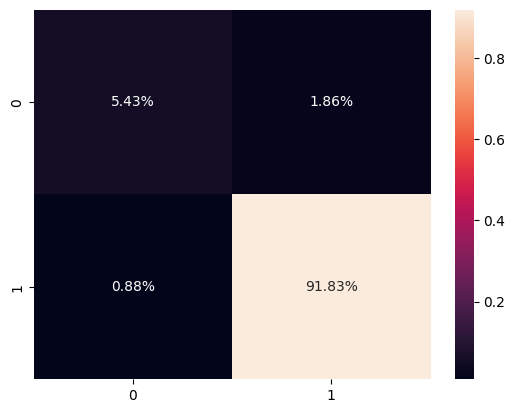

In [ ]:
sgd_model, sgd_acc = model_acc_func(SGDClassifier(max_iter=1000, tol=1e-3, random_state=42), X_train, y_train, X_test, y_test)

#### ```KNN``` model - 8min

Test Accuracy :   99.69056%  
              precision    recall  f1-score   support

           0       0.99      0.97      0.98      5890
           1       1.00      1.00      1.00     74900

    accuracy                           1.00     80790
   macro avg       0.99      0.98      0.99     80790
weighted avg       1.00      1.00      1.00     80790



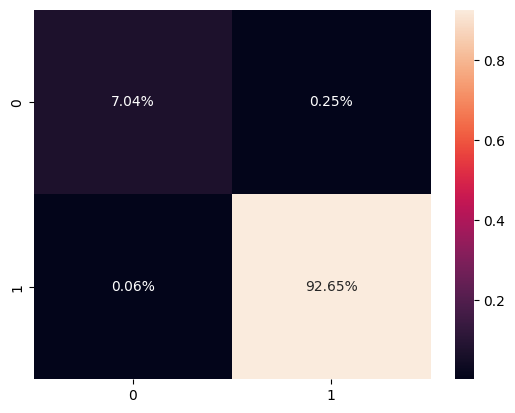

In [ ]:
knn_model, knn_acc = model_acc_func(KNeighborsClassifier(), X_train, y_train, X_test, y_test)

#### Linear ```SVM``` model

Test Accuracy :   97.25956%  
              precision    recall  f1-score   support

           0       0.86      0.75      0.80      5890
           1       0.98      0.99      0.99     74900

    accuracy                           0.97     80790
   macro avg       0.92      0.87      0.89     80790
weighted avg       0.97      0.97      0.97     80790



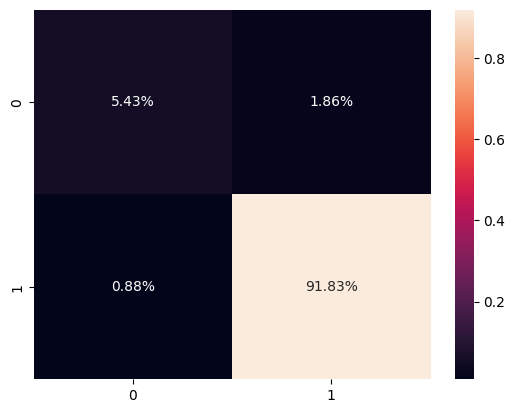

In [ ]:
linear_svm_model, linear_svm_acc = model_acc_func(SGDClassifier(loss='hinge', random_state=42), X_train, y_train, X_test, y_test)

#### ```SVM``` model - 22min

Test Accuracy :   99.75121%  
              precision    recall  f1-score   support

           0       0.99      0.98      0.98      5890
           1       1.00      1.00      1.00     74900

    accuracy                           1.00     80790
   macro avg       0.99      0.99      0.99     80790
weighted avg       1.00      1.00      1.00     80790



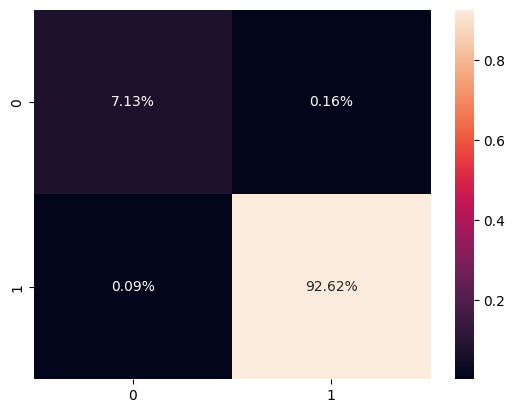

In [ ]:
svm_model, svm_acc = model_acc_func(SVC(), X_train, y_train, X_test, y_test)

#### ```MLPClassifier``` model - 3min

Test Accuracy :   99.92945%  
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      5890
           1       1.00      1.00      1.00     74900

    accuracy                           1.00     80790
   macro avg       1.00      1.00      1.00     80790
weighted avg       1.00      1.00      1.00     80790



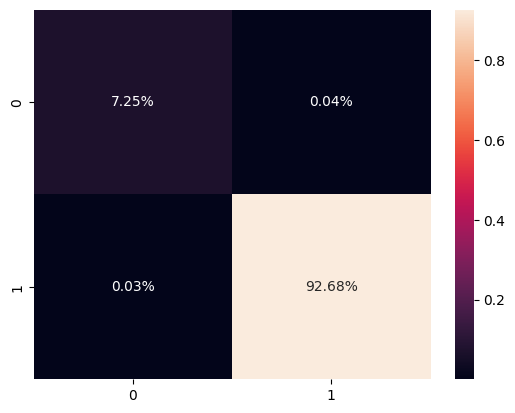

In [ ]:
mlp_model, mlp_acc = model_acc_func(MLPClassifier(), X_train, y_train, X_test, y_test)

#### ```GradientBoostingClassifier``` model

Test Accuracy :   96.01931%  
              precision    recall  f1-score   support

           0       0.72      0.74      0.73      5890
           1       0.98      0.98      0.98     74900

    accuracy                           0.96     80790
   macro avg       0.85      0.86      0.85     80790
weighted avg       0.96      0.96      0.96     80790



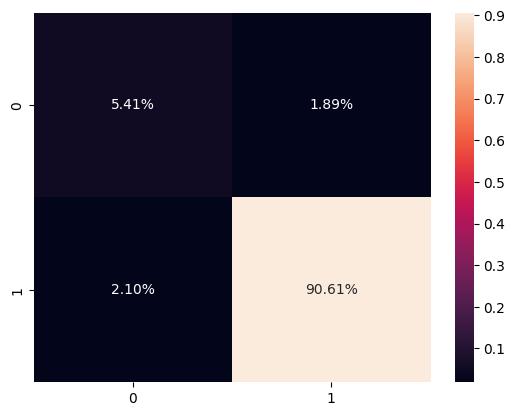

In [ ]:
gbc_model, gbc_acc = model_acc_func(GradientBoostingClassifier(n_estimators=10, learning_rate=1.0, max_depth=1, random_state=0), X_train, y_train, X_test, y_test)

#### ```RandomForestClassifier``` model - 2min

Test Accuracy :   99.99257%  
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5890
           1       1.00      1.00      1.00     74900

    accuracy                           1.00     80790
   macro avg       1.00      1.00      1.00     80790
weighted avg       1.00      1.00      1.00     80790



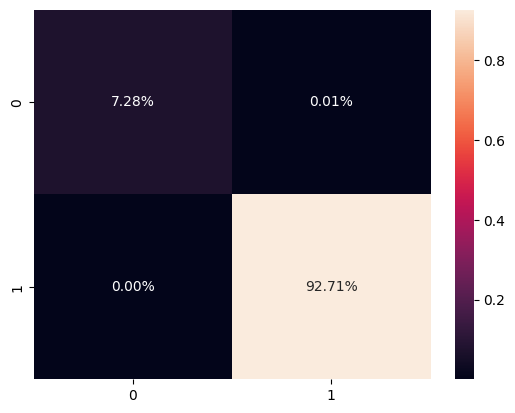

In [ ]:
rfc_model, rfc_acc = model_acc_func(RandomForestClassifier(), X_train, y_train, X_test, y_test)

#### ```DecisionTreeClassifier``` model

Test Accuracy :   99.94182%  
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5890
           1       1.00      1.00      1.00     74900

    accuracy                           1.00     80790
   macro avg       1.00      1.00      1.00     80790
weighted avg       1.00      1.00      1.00     80790



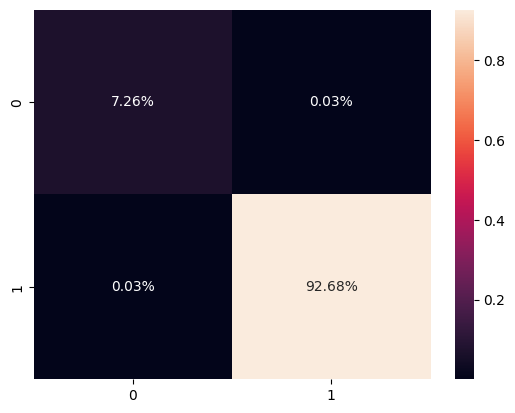

In [ ]:
dtc_model, dtc_acc = model_acc_func(DecisionTreeClassifier(), X_train, y_train, X_test, y_test)

In [ ]:
classification_probability = dtc_model.predict_proba(X_ul)
labels = dtc_model.predict(X_ul)

In [ ]:
df = pd.DataFrame(classification_probability, columns = ['Non-DoH', 'DoH']) 
df['label']=labels
df['actual']=y_ul
df['max_prob']=df[['Non-DoH', 'DoH']].max(axis=1)

In [ ]:
df.head()

,Non-DoH,DoH,label,actual,max_prob
0,0.0,1.0,1,1,1.0
1,0.0,1.0,1,1,1.0
2,1.0,0.0,0,0,1.0
3,0.0,1.0,1,1,1.0
4,0.0,1.0,1,1,1.0


In [ ]:
nc=np.arange(.9,1,.03)
acc=np.empty(22)
i=0
for k in np.nditer(nc):
    conf_ind=df['max_prob']>k
    X_train1 = np.append(X_train,X_ul[conf_ind,:],axis=0)
    y_train1 = np.append(y_train,df.loc[conf_ind,['label']])
    clf = DecisionTreeClassifier().fit(X_train1, y_train1)
    acc[i]=  clf.score(X_test, y_test)
    i = i + 1

(array([     0.,      0.,      0.,      0.,      0., 131957.,      0.,
             0.,      0.,      0.]),
 array([0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3, 1.4, 1.5]),
 <BarContainer object of 10 artists>)

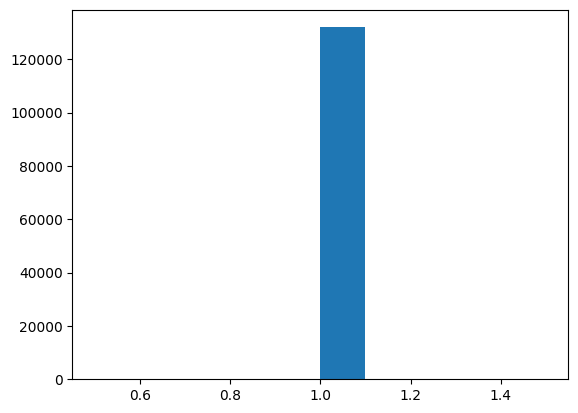

In [ ]:
plt.hist(df['max_prob'])

In [ ]:
X_train1.shape

(188509, 33)

Test Accuracy :   99.95049%  
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5890
           1       1.00      1.00      1.00     74900

    accuracy                           1.00     80790
   macro avg       1.00      1.00      1.00     80790
weighted avg       1.00      1.00      1.00     80790



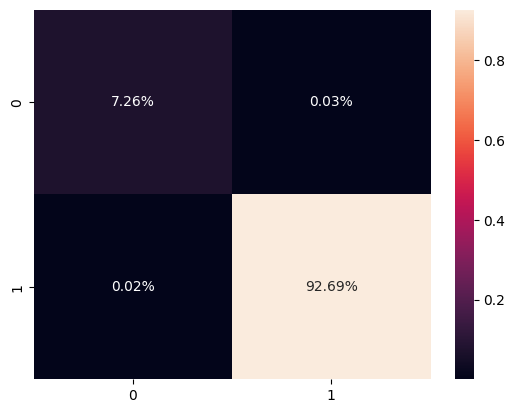

In [ ]:
final_dtc_model, final_dtc_model = model_acc_func(DecisionTreeClassifier(), X_train1, y_train1, X_test, y_test)